<h2> Session 4. Union between CoppeliaSim and Jupyter Notebook in Python</h2>

Important notes:

<br>- Requires that the files 'sim.py', 'simConst.py', 'remoteapi.dll' be hosted in the same folder as this Jupyter notebook. You have these files in the folder attached to the session.
<br>- Requires using the Planar Robot (which was done in Coppelia in a previous session), if you do not have it, you have the teacher's planar robot scene stored in the same folder: PlanarRobot.ttt.

Follow the following video to create it:

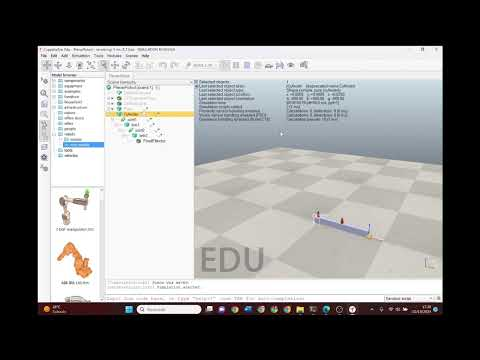

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('JxeMtvquP8I')

<h4> Essential Instructions:</h4>
<br>1. Open the scene PlanarRobot.ttt.
<br>2. Selecting the robot base from the scene hierarchy, right-click and add a script file using Add -> Associated child script -> Non threaded -> Lua. A small document icon will appear next to the robot name in the hierarchy scene.

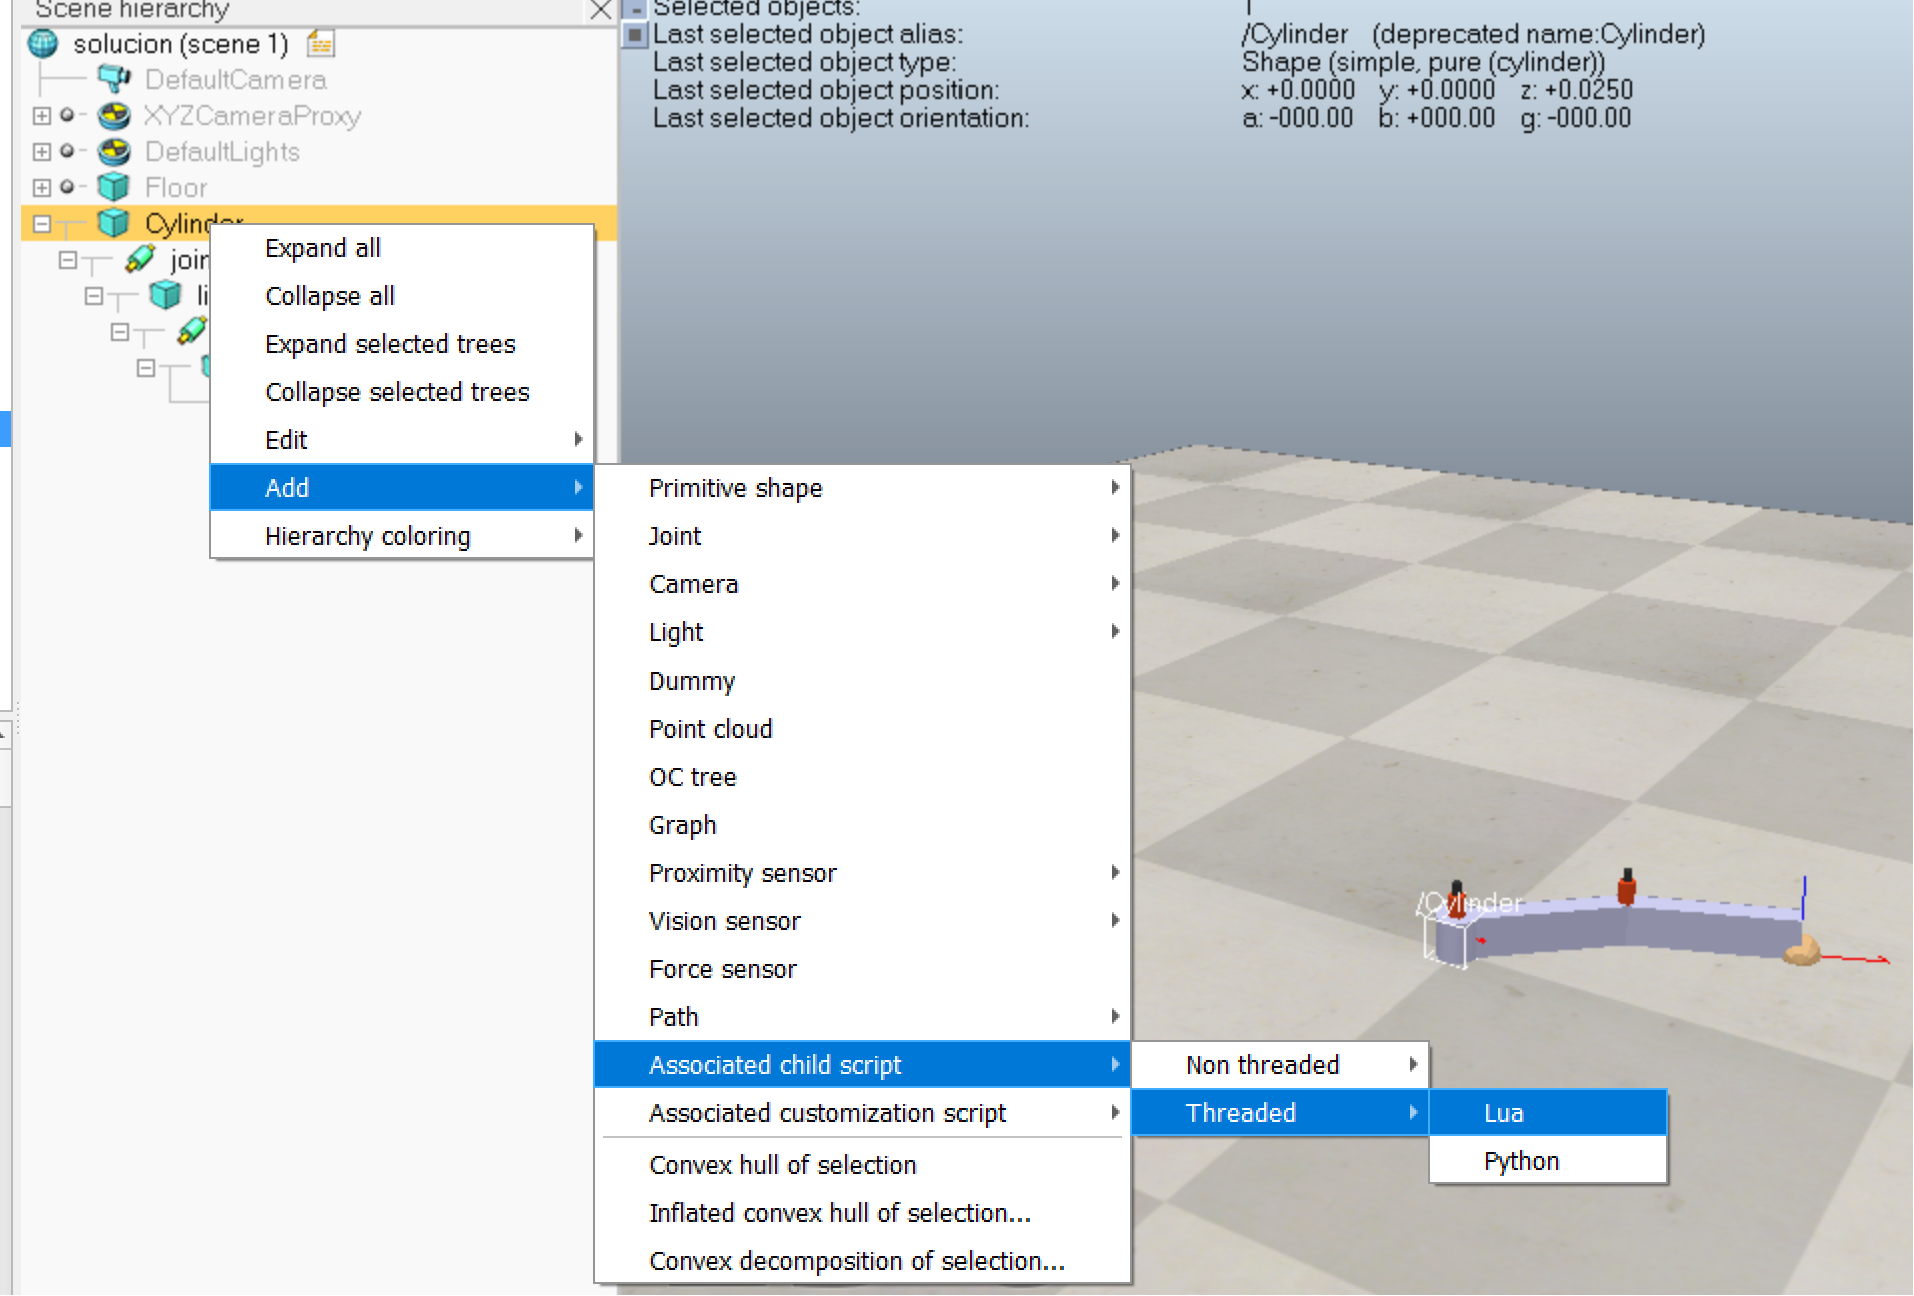

In [58]:
from IPython.display import Image
Image('script.png', width=500)


<br>3. In the script it is possible to include programming code, written in LUA language. And in our case, all the code we will require is to enable the remote API, assigning a communication port. inside the <b>sysCall_init()</b> function add the following line:
<br>
<font face = "Monospace"> <pre> simRemoteApi.start(19999)</font>

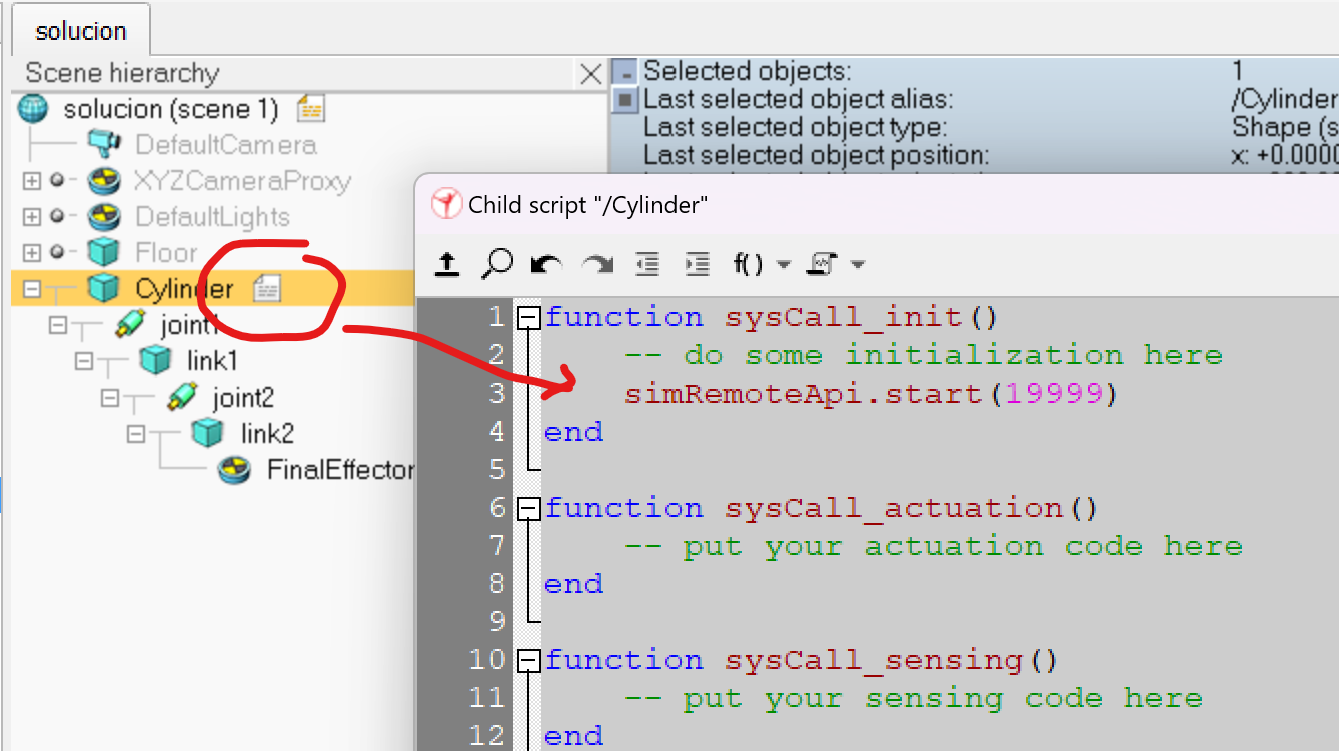

In [59]:
from IPython.display import Image
Image('script2.png', width=500)

### 0 Import libraries

The Sim library allows you to use the coppelia instructions

In [12]:
import sim
import numpy as np

### 1. Establish the connection
We will use the functions of the COPPELIA Remote API.


In [13]:
def connect(port):
# Establishes the connection to COPPELIA
# The port must match the connection port in COPPELIA -- PRESS PLAY in Coppelia Scene!!!
# returns the client number or -1 if the connection cannot be established
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("connect to ", port)
    else: print("Can not connect ")
    return clientID


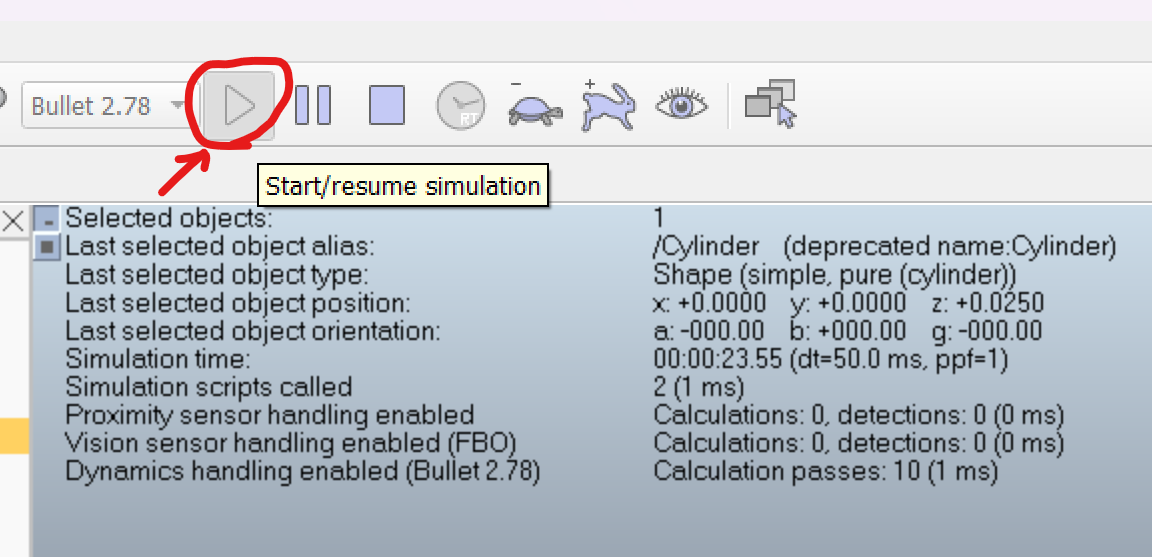

In [14]:
from IPython.display import Image
Image('play.png', width=500)

In [15]:
# Connect to the COPPELIA server
# *** It must be executed every time the simulation is restarted ***
# Remember press PLAY before in coppelia scene
clientID = connect(19999)

connect to  19999


<h3> 2. Get the handlers </h3>
A handler is an identifier number that Coppelia assigns to each of the elements in the scene.

In [29]:
# We obtain the handler for the dummy (Caution: is called FinalEffector in this scene)
returnCode,handler=sim.simxGetObjectHandle(clientID,'FinalEffector',sim.simx_opmode_blocking)
dummy = handler
print(dummy)

20


In [30]:
# From its controller we can act on the object,
# e.g. get your position
returnCode,pos=sim.simxGetObjectPosition(clientID, dummy, -1, sim.simx_opmode_blocking)
print(pos)

[0.4000000059604645, -4.0011771488934755e-05, 9.12696123123169e-08]


<h4> Podemos ver en la escena del copelia que coincide la posición (has de marcar el EffectorFinal) </h4>

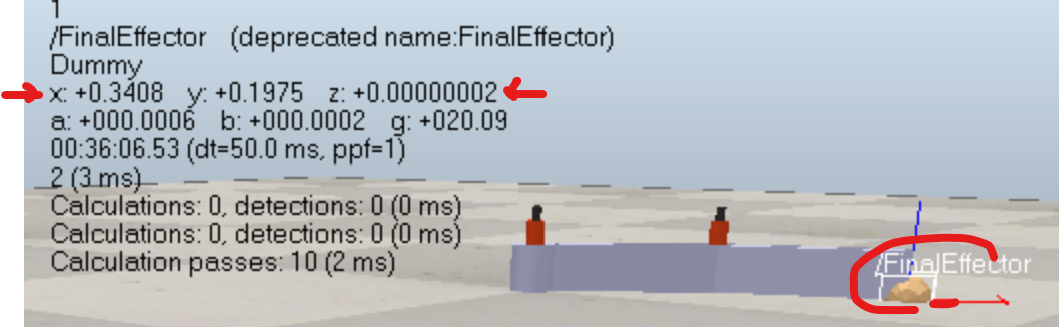

In [31]:
from IPython.display import Image
Image('posdummy.png', width=500)

If the robot initially in the coppelia has joint1 and joint2 at 0 degrees, the approximate position must be output (0.4,0,0)
Remember that the Coppelia environment simulates reality and exact values will not appear.

<h3> 3. What is the position of the joints?</h3>
Using the previous controllers, we can obtain information about the elements.
in this case angular value in radians of each axis

In [32]:
# We obtain the controllers for each of the robot's joints (Called joint1 and joint2 in the scenne)
ret,joint1=sim.simxGetObjectHandle(clientID,'joint1',sim.simx_opmode_blocking)
ret,joint2=sim.simxGetObjectHandle(clientID,'joint2',sim.simx_opmode_blocking)
print(joint1, joint2)

16 18


In [33]:
# We read the position of Joint1, in radians.
returnCode, pos1 = sim.simxGetJointPosition(clientID, joint1, sim.simx_opmode_blocking)
print(pos1)

-0.00010156631469726562


In [34]:
# We read the position of Joint1, in radians.
returnCode, pos2 = sim.simxGetJointPosition(clientID, joint2, sim.simx_opmode_blocking)
print(pos2)

-1.9073486328125e-06


<h3> 4. We move the robot </h3>
Using controllers, we can send parameters to elements.

In [35]:
# we send the position of joint1 (-30º), in radians.
q1 = -30 * np.pi/180
returnCode = sim.simxSetJointTargetPosition(clientID, joint1, q1, sim.simx_opmode_oneshot)
print(returnCode)

1


In [36]:
# we send the position of joint2 (30º), in radians.
q2 = 30 * np.pi/180
returnCode = sim.simxSetJointTargetPosition(clientID, joint2, q2, sim.simx_opmode_oneshot)
print(returnCode)

1


In [37]:
# Retorna la posición del Dummy con los anteriores .
returnCode,pos=sim.simxGetObjectPosition(clientID, dummy, -1, sim.simx_opmode_blocking)
print(pos)

[0.3859623372554779, 0.01777999848127365, 7.078051567077637e-08]
